## Calculating the Return of a Portfolio of Securities

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2000-1-1’ until today.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['BP', 'F', 'XOM', 'LNC', 'AAPL']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4344 entries, 2000-01-03 to 2017-04-07
Data columns (total 5 columns):
BP      4344 non-null float64
F       4344 non-null float64
XOM     4344 non-null float64
LNC     4344 non-null float64
AAPL    4344 non-null float64
dtypes: float64(5)
memory usage: 203.6 KB


In [4]:
mydata.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2000-01-03,28.036699,18.286657,25.593794,26.718066,3.625643
2000-01-04,27.887726,17.675648,25.103569,25.948586,3.319964
2000-01-05,28.841153,17.741113,26.472112,25.050859,3.368548
2000-01-06,28.900742,17.762935,27.840655,25.509338,3.077039
2000-01-07,28.364440,19.072242,27.758951,26.155689,3.222794


In [5]:
mydata.tail()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2017-04-03,34.400002,11.44,82.070000,64.936902,143.699997
2017-04-04,34.790001,11.37,82.370003,64.877166,144.770004
2017-04-05,34.590000,11.26,82.529999,64.250000,144.020004
2017-04-06,34.730000,11.27,83.010002,65.699997,143.660004
2017-04-07,34.849998,11.23,82.760002,65.610001,143.339996


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [6]:
mydata.iloc[0]

BP      28.036699
F       18.286657
XOM     25.593794
LNC     26.718066
AAPL     3.625643
Name: 2000-01-03 00:00:00, dtype: float64

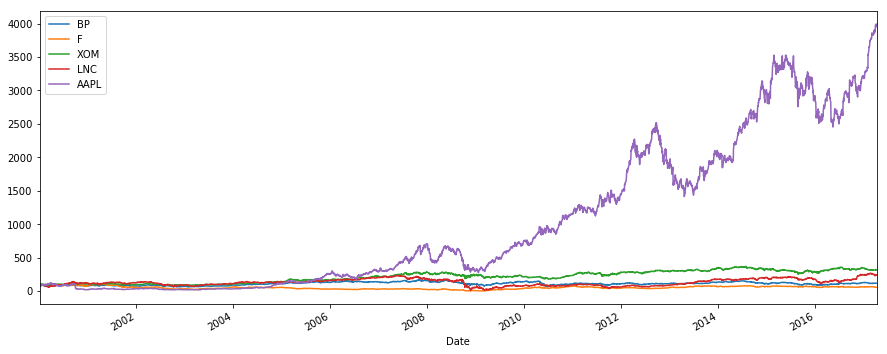

In [7]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [8]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.005313,-0.033413,-0.019154,-0.028800,-0.084310
2000-01-05,0.034188,0.003704,0.054516,-0.034596,0.014634
2000-01-06,0.002066,0.001230,0.051698,0.018302,-0.086538
2000-01-07,-0.018557,0.073710,-0.002935,0.025338,0.047369


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [9]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [10]:
annual_returns = returns.mean() * 250
annual_returns

BP      0.053446
F       0.064875
XOM     0.097743
LNC     0.196982
AAPL    0.304511
dtype: float64

In [11]:
np.dot(annual_returns, weights)

0.14351158327299329

Transform the result into a percentage form. 

In [12]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print pfolio_1

14.351 %


Is the return of this portfolio satisfactory?